101 XOR 111 = 010


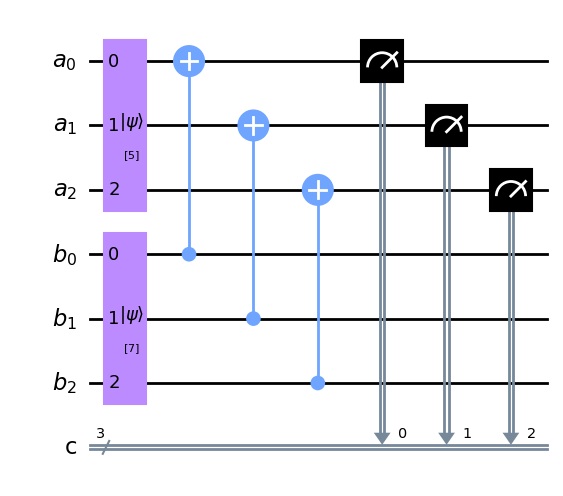

In [4]:
# This is the XOR Adder

from qiskit import BasicAer, execute, QuantumCircuit, ClassicalRegister, QuantumRegister

while True:
    try:
        n1, n2 = [bin(int(input(f"Give number {i}: ")))[2:] for i in range(1, 3)]
        break
    except:
        print("Invalid input. Please try again!")

l = max(len(n1), len(n2))
n1, n2 = n1.zfill(l), n2.zfill(l)

a = QuantumRegister(l, 'a')
b = QuantumRegister(l, 'b')
c = ClassicalRegister(l, 'c')
qc = QuantumCircuit(a, b, c)

qc.initialize(int(n1, 2), a)
qc.initialize(int(n2, 2), b)

for i in range(l) :
    qc.cx(b[i], a[i])

qc.measure(a, c)
backend = BasicAer.get_backend('qasm_simulator')
results = execute(qc, backend, shots=1).result().get_counts()
print(f'{n1} XOR {n2} = {list(results.keys())[0]}')

display(qc.draw('mpl', filename='xor_adder.svg'))

In [7]:
# This is the XOR based encryptor-decryptor

from qiskit import BasicAer, execute, QuantumCircuit, ClassicalRegister, QuantumRegister

def crypt(bsl, key, kl) :
    output = []

    for i in bsl :
        a = QuantumRegister(kl, 'a')
        b = QuantumRegister(kl, 'b')
        c = ClassicalRegister(kl, 'c')
        qc = QuantumCircuit(a, b, c)

        qc.initialize(int(i, 2), a)
        qc.initialize(int(key, 2), b)

        for i in range(kl) :
            qc.cx(b[i], a[i])

        qc.measure(a, c)
        results = execute(qc, backend, shots=1).result().get_counts()
        output.append(list(results.keys())[0])
    
    return output, qc


kl = 8
backend = BasicAer.get_backend('qasm_simulator')

while True:
    try:
        s = input('Give string to be encrypted: ')
        bsl = [format(ord(i), '08b') for i in s]
        break
    except:
        print("Invalid character (out of ASCII dictionary). Please try again!")

while True:
    try:
        key = input(f'Give {kl}-bit binary key to encrypt the string: ')
        if all(b in '01' for b in key) and len(key) == kl :
            break
        else :
            raise Exception
    except:
        print("Invalid input. Check if it is binary and has length 8!")

print('\nThis is the string to be encrypted:', s)

print('\nThis is the binary of the string:', ''.join(bsl))

estringl, qc = crypt(bsl, key, kl)
print('\nThis is the encrypted string:', ''.join(estringl))

print('\nThis is would would be shown if anyone read the encrypted string:',
      ''.join([chr(int(i, 2)) for i in estringl]))

dstringl, qc = crypt(estringl, key, kl)
print('\nThis is the decrypted binary string:', ''.join(dstringl))

print('\nThis is the decrypted string:',
      ''.join([chr(int(i, 2)) for i in dstringl]))

# display(qc.draw('mpl'))


 This is the string to be encrypted: hello

This is the binary of the string: 0110100001100101011011000110110001101111

This is the encrypted string: 1010001010101111101001101010011010100101

This is would would be shown if anyone read the encrypted string: ¢¯¦¦¥

This is the decrypted binary string: 0110100001100101011011000110110001101111

This is the decrypted string: hello
